<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SEA LEVEL RISE PROJECT**

**This notebook contains my work on sea level rise data collected from 1880 to 2014.**

#So what is this project about?

Using pandas, numpy, scipy, sklearn and visualisation tools to analyse and understand the sea level data, make sense of what it is telling us and seeing if I can predict what to expect in the future. 

# Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv



Before I proceed further, I needed to know what I am looking at. I found out that

1. There are two different measurements for sea levels in this data set - CSIRO and NOAA for each year. 
2. CSIRO, Commonwealth Scientific and Industrial Research Organisation, is an Australian Government agency responsible for scientific research. CSIRO data comes from Sea level research at CSIRO's Oceans and Atmosphere Flagship and the Antarctic Climate and Ecosystems Cooperative Research Centre (ACE CRC). They use data from tide gauges and satellite altimeters to determine past changes in global mean and regional sea level. Their sea level data has been recorded since 1880.
3. The NOAA (National Oceanic and Atmospheric Administration) is part of US department of commerce and they measure sea level trends by tide gauges that are present at local relative sea level (RSL) as opposed to the global sea level trend. Tide gauge measurements are made with respect to a local fixed reference on land. RSL is a combination of the sea level rise and the local vertical land motion. Their global sea level trend has been recorded by satellite altimeters since 1992.

We can think of this data file as containing 2 data sets - one from CSIRO and one from NOAA. The NOAA data set is smaller than CSIRO data set. Whatever I do below for one dataset can be repeated for the next one the same way.

First I need to 
*  import the pandas library
*  import the numpy library
*  read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
*  use df.head() and df.info() to inspect the data and the column data types

This part is straight forward. I always prefer keeping the url in the main code and leave the function to simply read from the url. This is just in case the url gets changed or if I decide to use the same function but to read another data set from a different url. I feel this allows more flexibility.

In [ ]:
import pandas as pd
import numpy as np

def get_data(url): # this function gets data stored as csv file from a given url
  df = pd.read_csv(url)
  return df

url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv"
sea_level = get_data(url)


Now let's take a look at what the data looks like...

1. Using .head() to see the first few rows
2. Get technical summary to know what each column values and variables looks like

In [ ]:
class color:   #### I just found this class definition online at stackoverflow - for me this makes the print statements more clearer to see.
   PURPLE = '\033[95m' ### this can be used to change print text colours, font etc
   CYAN = '\033[96m'   #### I have chosen to use bold for the headings in my print statements
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'        
print(color.BOLD +"What does the first 5 rows look like?\n"+ color.END)
print(sea_level.head()) #first 5 rows
print(color.BOLD +"\n\nTechnical summary\n"+ color.END)
print(sea_level.info()) #technical summary

What does the first 5 rows look like?

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


Technical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null   

### Next
---
1. I want to look at some statistics on the level array, eg:
*  mean
*  standard deviation
*  total 

2.  Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.

### Note 2:
Before proceeding any further, I want to get rid of null values to clean up the data. 

In [ ]:
#find any null values
#def any_nulls(df):
#  df_null = df.isna().any()
#  return df_null
#null_values = any_nulls(sea_level)
#print(null_values)

I got the following when I tested for null values (code is now commented since it is unnecessary).


Year                        False

CSIRO Adjusted Sea Level    False

Lower Error Bound           False

Upper Error Bound           False

NOAA Adjusted Sea Level      True

dtype: bool




All columns except NOAA adjusted sea level have no null values. Again, this because NOAA data collection is only recorded from 1992. Like I mentioned before, we can repeat the whole analysis with NOAA data at a later point. So I will drop that off NOAA column to make a new data frame. I'm aware that this means that I am missing out on some of the information. But for now, I will work with the CSIRO Adjusted Sea Level. This exact calculations can be repeated with the NOAA adjusted sea level column as well. So I am saving the dataframe after dropping the NOAA column into a new dataframe so as to not lose the information.

In [ ]:
df_new = sea_level.drop(columns=['NOAA Adjusted Sea Level'])

Now that we have a clean data set to work with. Let's proceed further into calculating the statistics.

In [ ]:

sea_level_arr = np.array(df_new["CSIRO Adjusted Sea Level"],np.float64)
sea_year_arr = np.array(df_new["Year"],np.int64)
sea_mean = np.mean(sea_level_arr)
sea_std = np.std(sea_level_arr)
sea_total = np.sum(sea_level_arr)
print("The average sea level is", "{:10.2f}".format(sea_mean), "\nThe standard deviation of sea_level is", "{:10.2f}".format(sea_std), "\nThe total sea level is", "{:10.2f}".format(sea_total))

max_level = np.amax(sea_level_arr)
min_level = np.amin(sea_level_arr)
max_index = np.where(sea_level_arr == max_level)
max_year = max_index[0] +sea_year_arr[0]
min_index = np.where(sea_level_arr == min_level)
min_year = min_index[0] +sea_year_arr[0]
print("The sea level was highest at", "{:10.2f}".format(max_level), "in the year", max_year)
print("The sea level was lowest at", "{:10.2f}".format(min_level), "in the year", min_year)


The average sea level is       3.65 
The standard deviation of sea_level is       2.48 
The total sea level is     489.15
The sea level was highest at       9.33 in the year [2012]
The sea level was lowest at      -0.44 in the year [1882]


We can do the same thing, by using describe as well. So let's try that and cross check the results.

In [ ]:
print(sea_level.describe())

              Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
count   134.000000                134.000000         134.000000   
mean   1946.500000                  3.650341           3.204666   
std      38.826537                  2.485692           2.663781   
min    1880.000000                 -0.440945          -1.346457   
25%    1913.250000                  1.632874           1.078740   
50%    1946.500000                  3.312992           2.915354   
75%    1979.750000                  5.587598           5.329724   
max    2013.000000                  9.326772           8.992126   

       Upper Error Bound  NOAA Adjusted Sea Level  
count         134.000000                21.000000  
mean            4.096016                 7.363746  
std             2.312581                 0.691038  
min             0.464567                 6.297493  
25%             2.240157                 6.848690  
50%             3.710630                 7.488353  
75%             5.845472        

So they do match quite well.

Next I want to find the Pearson product-moment correlation coefficient between year and the rise in sea level. I'm aware that we are missing NOAA adjusted sea level. We can also repeat the same for that column with just the 21 rows of available data (although the reliability of conclusions based on just 21 rows may be questionable). But for now, I'm going to continue working with CSIRO Adjusted Sea Level for all years from 1880.

In [ ]:
def get_correlation(nparray1,nparray2):
  # code to get the correlation figure for both salaries
  R_matrix = np.corrcoef(nparray1, nparray2)
  return R_matrix

R_value = get_correlation(sea_level_arr,sea_year_arr)
print(color.BOLD+"The Pearson correlation coefficient between year and sea level is:"+color.END+"{:10.2f}".format(R_value[0][1]))
print("This shows that there is a strong correlation between year and rising sea levels")


The Pearson correlation coefficient between year and sea level is:      0.98
This shows that there is a strong correlation between year and rising sea levels


Let us visualise the data to "see" what the trend looks like for sea-levels. I am going to use matplotlib for this.

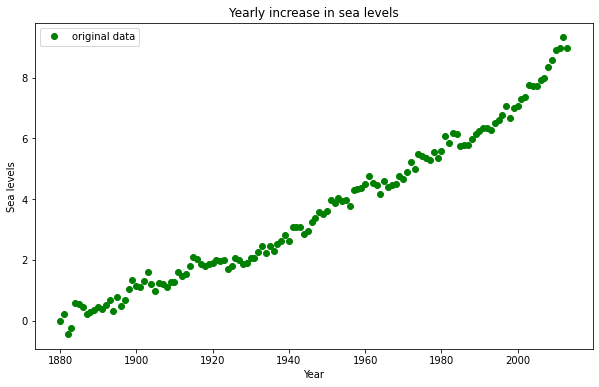

In [ ]:
import matplotlib.pyplot as plt
def visualise_oneplot(x_array,y_array,x_label,y_label,plot_title):
  plt.figure(figsize=(10,6))
  plt.plot(x_array, y_array, 'o', color = 'g', label='original data') 
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)
  plt.show()
  return

fig1 = visualise_oneplot(sea_year_arr, sea_level_arr,"Year","Sea levels","Yearly increase in sea levels")



The sea-level has been increasing on an average from 1880 to 2014 (years of data collection). We do see small changes within the overall trend. Some years have more sharper increase than the others. But somewhere around 2000 there has been steady and sharper increase in the sea-levels. I would like to investigate this further. First let's find the trend... I will use linear regression first to fit the trend.

I will use sklearn's linear model. I can then use this linear model to predict the sea levels in the future. The idea is linear regression uses, y =m*x+c, where m is the slope/gradient of the line and c is the intercept. Using this we can find y for any x.

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats.stats import pearsonr

def regression_model(x,y):
  lin_model = stats.linregress(x, y)
  return lin_model

def predict_sea_level(m,x,c):
  y = m*x+c
  return y

lin_model = regression_model(sea_year_arr,sea_level_arr)
m_slope = lin_model.slope
c_intercept = lin_model.intercept
print(lin_model)
print("The slope is",m_slope)
print("The intercept is",c_intercept)
print(f"R-squared: {lin_model.rvalue**2:.4f}")
print("P-value is", lin_model.pvalue)



LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715)
The slope is 0.0630445840121348
The intercept is -119.06594196773978
R-squared: 0.9697
P-value is 3.7886969791131554e-102


I would like to see how this linear model actually looks when compared to the data. So let's plot using matplotlib

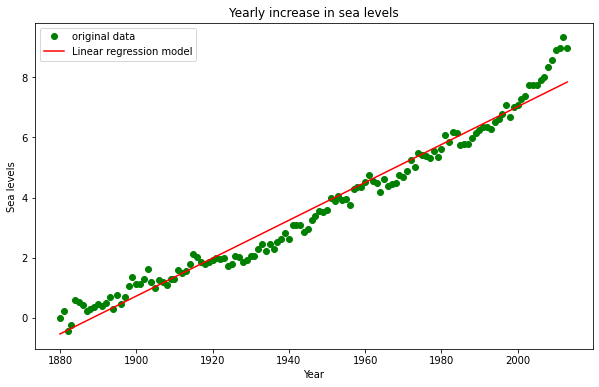

In [ ]:
def visualise_plotline(x_array,y_array,x_label,y_label,plot_title,model):
  plt.figure(figsize=(10,6))
  plt.plot(x_array, y_array, 'o', color = 'g', label='original data')
  plt.plot(x_array, model.intercept + model.slope*x_array, 'r', label='Linear regression model')
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)
  plt.show()
  return
fig2 = visualise_plotline(sea_year_arr, sea_level_arr,"Year","Sea levels","Yearly increase in sea levels",lin_model)

I want to use the above linear model to get future predictions - saved to a dataframe called df_pred.

In [ ]:

#predict sea level for years 2014 to 2050 using linear regression
rows =[]
for i in range(2014, 2051):
  rows.append([i,predict_sea_level(m_slope,i,c_intercept)])

df_pred = pd.DataFrame(rows, columns=["Year", "predicted_sea-level"])

print(df_pred)

    Year  predicted_sea-level
0   2014             7.905850
1   2015             7.968895
2   2016             8.031939
3   2017             8.094984
4   2018             8.158029
5   2019             8.221073
6   2020             8.284118
7   2021             8.347162
8   2022             8.410207
9   2023             8.473251
10  2024             8.536296
11  2025             8.599341
12  2026             8.662385
13  2027             8.725430
14  2028             8.788474
15  2029             8.851519
16  2030             8.914564
17  2031             8.977608
18  2032             9.040653
19  2033             9.103697
20  2034             9.166742
21  2035             9.229786
22  2036             9.292831
23  2037             9.355876
24  2038             9.418920
25  2039             9.481965
26  2040             9.545009
27  2041             9.608054
28  2042             9.671099
29  2043             9.734143
30  2044             9.797188
31  2045             9.860232
32  2046  

How about adding our predictions to the plot?

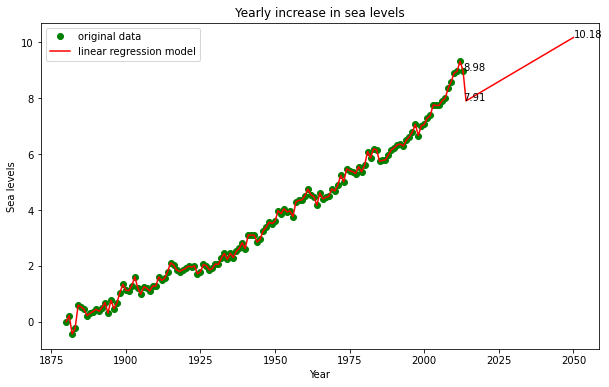

In [ ]:
pred_year_arr = np.array(df_pred["Year"],np.int64)
pred_sea_level = np.array(df_pred["predicted_sea-level"],np.float64)
new_year_arr = np.append(sea_year_arr, pred_year_arr, axis = 0)
new_sea_level = np.append(sea_level_arr, pred_sea_level, axis = 0)
label1 = "{:.2f}".format(pred_sea_level[0])
label2 = "{:.2f}".format(sea_level_arr[133])
label3 = "{:.2f}".format(pred_sea_level[36])

plt.figure(figsize=(10,6))
plt.plot(sea_year_arr, sea_level_arr, 'o', color = 'g', label='original data')
plt.plot(new_year_arr, new_sea_level, 'r', label='linear regression model')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Sea levels")
plt.title("Yearly increase in sea levels")
ax = plt.gca()
ax.annotate(label1, xy=(2013, pred_sea_level[0]))
ax.annotate(label2, xy=(2013, sea_level_arr[133]))
ax.annotate(label3, xy=(2050, pred_sea_level[36]))
plt.show()

The above plot clearly shows that the data (with red line) until 2013 and from 2014 to 2050 the line shows predicted sea level using linear regression. We can clearly see that the linear regression prediction (7.91 cm) is slightly lower than actual data points(8.98 cm). 

My thought at this point is: "A polynomial model might be more accurate for predicting the sea level than linear regression model."

Regarding the programming with python- I have now applied my skills to use linear models, plot and visualize data, using numpy arrays, appending arrays and creating new dataframes from arrays. 

Before abandoning the linear model and doing a polynomical model, I want to see what other information I can gather using the linear model. I have so far looked at the overall picture of sea level from 1880 to 2013. As mentioned before there are slight changes to the trend every few years. It will also be helpful to look at details of a few decades at a time. So let's take small slices of the dataframe and look at the linear regression in short spurts.

In [ ]:
def filter_df(df, start, end): # function to take slices of data depending on the start year and end year.
  df = df_new[(df_new['Year']>=start) & (df_new['Year']<=end)]
  return df

df_2000 = filter_df(df_new, 2001, 2013) # data from 2001 onwards
sea_level_2000 = np.array(df_2000["CSIRO Adjusted Sea Level"],np.float64)
sea_year_2000 = np.array(df_2000["Year"],np.int64)


We had seen a drastic change in the increase from the year 2000. So let's start with that year and do a linear regression fit using my lin_model function.

In [ ]:
model_2000 = regression_model(sea_year_2000,sea_level_2000) 
m_slope_2000 = model_2000.slope
c_intercept_2000 = model_2000.intercept
print(model_2000)
print("The slope is",m_slope_2000)
print("The intercept is",c_intercept_2000)
print(f"R-squared: {model_2000.rvalue**2:.4f}")
print("P-value is", model_2000.pvalue)

LinregressResult(slope=0.1665008218406594, intercept=-325.9412257601265, rvalue=0.9706436838638605, pvalue=3.758364132175293e-08, stderr=0.012439846941724349)
The slope is 0.1665008218406594
The intercept is -325.9412257601265
R-squared: 0.9421
P-value is 3.758364132175293e-08


Let us see how this small slice into data looks like from 2000. So we can see that the linear fit is much better now. For this, I am going to call my function visualize_plotline so I can see both the data and my linear model (model_2000) fit to data.

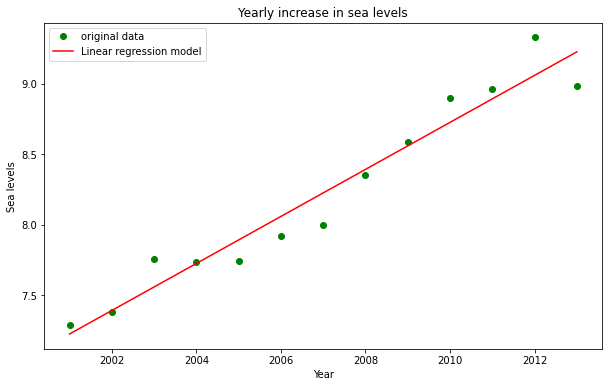

In [ ]:
fig4 = visualise_plotline(sea_year_2000, sea_level_2000,"Year","Sea levels","Yearly increase in sea levels",model_2000)

Using this new linear model, let's predict the future sea levels.

In [ ]:

#predict sea level for years 2014 to 2050 using the new linear regression model
rows =[]
for i in range(2014, 2031):
  rows.append([i,predict_sea_level(m_slope_2000,i,c_intercept_2000)])

df_pred_2000 = pd.DataFrame(rows, columns=["Year", "predicted_sea-level"])

print(df_pred_2000)

    Year  predicted_sea-level
0   2014             9.391062
1   2015             9.557489
2   2016             9.723916
3   2017             9.890344
4   2018            10.056771
5   2019            10.223198
6   2020            10.389625
7   2021            10.556053
8   2022            10.722480
9   2023            10.888907
10  2024            11.055334
11  2025            11.221762
12  2026            11.388189
13  2027            11.554616
14  2028            11.721044
15  2029            11.887471
16  2030            12.053898


Let us now add the predictive model to the plot.

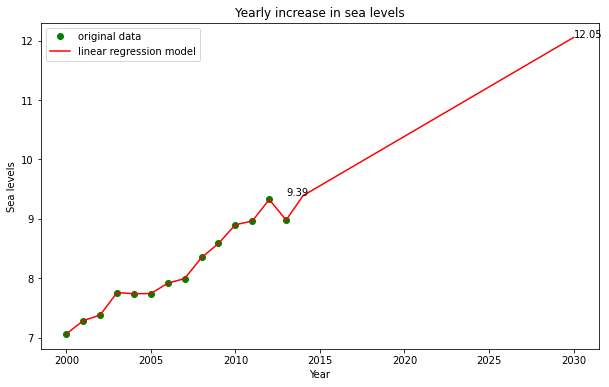

In [ ]:
df_2000_full = pd.concat([df_2000, df_pred_2000])

pred_yr_2000 = np.array(df_pred_2000["Year"],np.int64)
pred_level_2000 = np.array(df_pred_2000["predicted_sea-level"],np.float64)
label1 = "{:.2f}".format(pred_level_2000[0])
label2 = "{:.2f}".format(pred_level_2000[16])
new_year_2000 = np.append(sea_year_2000, pred_yr_2000, axis = 0)
new_level_2000 = np.append(sea_level_2000, pred_level_2000, axis = 0)
plt.figure(figsize=(10,6))
plt.plot(sea_year_2000, sea_level_2000, 'o', color = 'g', label='original data')
plt.plot(new_year_2000, new_level_2000, 'r', label='linear regression model')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Sea levels")
plt.title("Yearly increase in sea levels")
ax = plt.gca()
ax.annotate(label1, xy=(2013, pred_level_2000[0]))
ax.annotate(label2, xy=(2030, pred_level_2000[16]))
plt.show()


This plot shows the sea levels if the current trend continues. This you can see is slightly better than the initial linear model using all of the data (whcih had predicted much lower values).

We can do the same for any year intervals. This will give us an idea of sea levels in the years of interest and we can see how the linear regression model changes for those years.

In [ ]:
df_1900 = filter_df(df_new, 1900, 1999)
sea_level_1900 = np.array(df_1900["CSIRO Adjusted Sea Level"],np.float64)
sea_year_1900 = np.array(df_1900["Year"],np.int64)

model_1900 = regression_model(sea_year_1900,sea_level_1900)
m_slope_1900 = model_1900.slope
c_intercept_1900 = model_1900.intercept
print(model_1900)
print("The slope is",m_slope_1900)
print("The intercept is",c_intercept_1900)
print(f"R-squared: {model_1900.rvalue**2:.4f}")
print("P-value is", model_1900.pvalue)

LinregressResult(slope=0.061415054829168925, intercept=-116.06298010187481, rvalue=0.9879090743402357, pvalue=3.7354469308027463e-81, stderr=0.0009735827378204736)
The slope is 0.061415054829168925
The intercept is -116.06298010187481
R-squared: 0.9760
P-value is 3.7354469308027463e-81


Let's again use visualise_plotline to see what the linear model (model_1900) fit to data looks like.

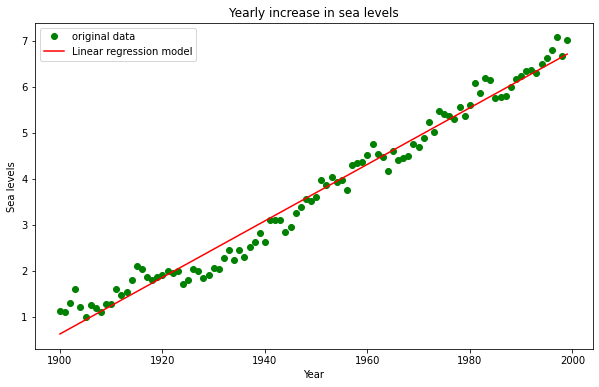

In [ ]:
fig6 = visualise_plotline(sea_year_1900, sea_level_1900,"Year","Sea levels","Yearly increase in sea levels",model_1900)

1920 to 1950 looks very interesting, since the sea level increase seems to have slowed down. Let's take a closer look there. 

In [ ]:
df_1920 = filter_df(df_new, 1920, 1950)
sea_level_1920 = np.array(df_1920["CSIRO Adjusted Sea Level"],np.float64)
sea_year_1920 = np.array(df_1920["Year"],np.int64)

model_1920 = regression_model(sea_year_1920,sea_level_1920)
m_slope_1920 = model_1920.slope
c_intercept_1920 = model_1920.intercept
print(model_1920)
print("The slope is",m_slope_1920)
print("The intercept is",c_intercept_1920)
print(f"R-squared: {model_1920.rvalue**2:.4f}")
print("P-value is", model_1920.pvalue)

LinregressResult(slope=0.06118713481733871, intercept=-115.8830088459375, rvalue=0.9491705793953945, pvalue=4.2620453210556987e-16, stderr=0.0037678998717265294)
The slope is 0.06118713481733871
The intercept is -115.8830088459375
R-squared: 0.9009
P-value is 4.2620453210556987e-16


As expected the slope is smaller 0.0612 compared to 0.0614. Let's plot it to see.

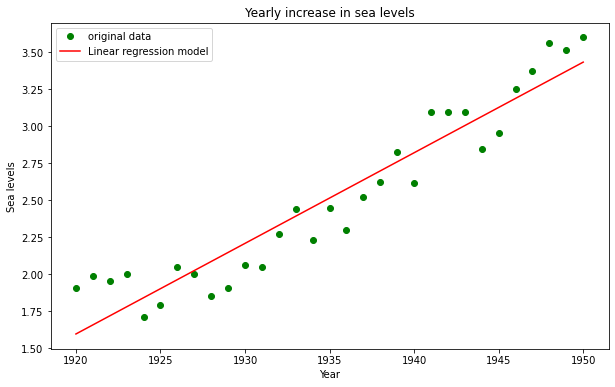

In [ ]:
fig7 = visualise_plotline(sea_year_1920, sea_level_1920,"Year","Sea levels","Yearly increase in sea levels",model_1920)

We can similarly do this for any two years and take a look at the data and fit a linear regression to see what the sea level trend looks like between those two years. 

From the dataset, it looks like the steep non-linear increase in sea levels actually started before the 1980s. Let's take a closer look between 1980 to 2000s.

In [ ]:
df_1980 = filter_df(df_new, 1950, 1979)
sea_level_1950 = np.array(df_1980["CSIRO Adjusted Sea Level"],np.float64)
sea_year_1950 = np.array(df_1980["Year"],np.int64)

model_1950 = regression_model(sea_year_1950,sea_level_1950)
m_1950 = model_1950.slope
c_1950 = model_1950.intercept
print(model_1950)
print("The slope is",m_1950)
print("The intercept is",c_1950)
print(f"R-squared: {model_1950.rvalue**2:.4f}")
print("P-value is", model_1950.pvalue)

LinregressResult(slope=0.05914795962780867, intercept=-111.61099608986346, rvalue=0.9350565001431694, pvalue=3.89761552897074e-14, stderr=0.0042377718156583035)
The slope is 0.05914795962780867
The intercept is -111.61099608986346
R-squared: 0.8743
P-value is 3.89761552897074e-14


In [ ]:
df_1980 = filter_df(df_new, 1980, 1999)
sea_level_1980 = np.array(df_1980["CSIRO Adjusted Sea Level"],np.float64)
sea_year_1980 = np.array(df_1980["Year"],np.int64)

model_1980 = regression_model(sea_year_1980,sea_level_1980)
m_slope_1980 = model_1980.slope
c_intercept_1980 = model_1980.intercept
print(model_1980)
print("The slope is",m_slope_1980)
print("The intercept is",c_intercept_1980)
print(f"R-squared: {model_1980.rvalue**2:.4f}")
print("P-value is", model_1980.pvalue)

LinregressResult(slope=0.06170741807368424, intercept=-116.50667204349479, rvalue=0.8743267392833189, pvalue=4.6657375869638015e-07, stderr=0.008073678554479633)
The slope is 0.06170741807368424
The intercept is -116.50667204349479
R-squared: 0.7644
P-value is 4.6657375869638015e-07


In [ ]:
df_1980 = filter_df(df_new, 2000, 2013)
sea_level_2000 = np.array(df_1980["CSIRO Adjusted Sea Level"],np.float64)
sea_year_2000 = np.array(df_1980["Year"],np.int64)

model_2000 = regression_model(sea_year_2000,sea_level_2000)
m_slope_2000 = model_2000.slope
c_intercept_2000 = model_2000.intercept
print(model_2000)
print("The slope is",m_slope_2000)
print("The intercept is",c_intercept_2000)
print(f"R-squared: {model_2000.rvalue**2:.4f}")
print("P-value is", model_2000.pvalue)

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163)
The slope is 0.1664272733318682
The intercept is -325.7934668059649
R-squared: 0.9531
P-value is 2.4388064141618245e-09


Compared to the previous years when the slope was around 0.0612-0.0615, between 1980 to 2000 the slope is 0.064 which then again increases to 0.1664 from 2000.

Let us plot these prediction from 1950s.

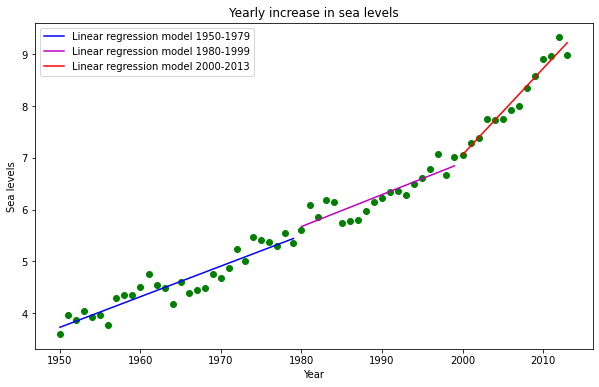

In [ ]:
def visualise_multiline_plots(x_array1,y_array1,x_array2,y_array2,x_array3,y_array3,x_label,y_label,plot_title,model1,model2,model3,label1,label2,label3):
  plt.figure(figsize=(10,6))
  plt.plot(x_array1, y_array1, 'o', color = 'g')
  plt.plot(x_array2, y_array2, 'o', color = 'g')
  plt.plot(x_array3, y_array3, 'o', color = 'g')
  plt.plot(x_array1, model1.intercept + model1.slope*x_array1, 'b', label=label1)
  plt.plot(x_array2, model2.intercept + model2.slope*x_array2, 'm', label=label2)
  plt.plot(x_array3, model3.intercept + model3.slope*x_array3, 'r', label=label3)
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)
  plt.show()
  return

fig10 = visualise_multiline_plots(sea_year_1950, sea_level_1950,sea_year_1980, sea_level_1980,sea_year_2000, sea_level_2000,"Year","Sea levels","Yearly increase in sea levels",model_1950,model_1980,model_2000,'Linear regression model 1950-1979','Linear regression model 1980-1999','Linear regression model 2000-2013')



How about adding the predictions into the future? Say, until 2030 - assuming that the current trend from 2000 continues.

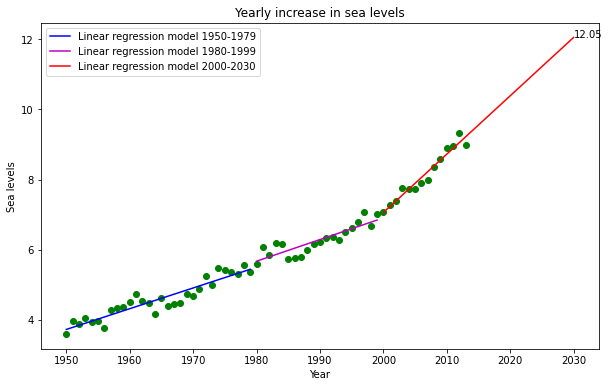

In [ ]:
rows = []
for i in range(2000, 2031):
  rows.append([i,predict_sea_level(m_slope_2000,i,c_intercept_2000)])

df_pred = pd.DataFrame(rows, columns=["Year", "predicted_sea-level"])

pred_year_arr = np.array(df_pred["Year"],np.int64)
pred_sea_level = np.array(df_pred["predicted_sea-level"],np.float64)

plt.figure(figsize=(10,6))
plt.plot(sea_year_1950, sea_level_1950, 'o', color = 'g')
plt.plot(sea_year_1980, sea_level_1980, 'o', color = 'g')
plt.plot(sea_year_2000, sea_level_2000, 'o', color = 'g')
plt.plot(sea_year_1950, model_1950.intercept + model_1950.slope*sea_year_1950, 'b', label='Linear regression model 1950-1979')
plt.plot(sea_year_1980, model_1980.intercept + model_1980.slope*sea_year_1980, 'm', label='Linear regression model 1980-1999')
plt.plot(pred_year_arr, pred_sea_level, 'r', label='Linear regression model 2000-2030')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Sea levels")
plt.title("Yearly increase in sea levels")
ax = plt.gca()
ax.annotate(label2, xy=(2030, pred_level_2000[16]))
plt.show()

This clearly shows that there is a steeper increase in the sea level during the 2000s. However, there are minor increases and the decreases in the rate of sea level raise over the years and the fit for linear regressions cannot capture all of it. It is a useful way to see how the trends have changed over small year intervals. The overall fit to linear line isn't always good - for example the linear fit to data between 1980 to 1999 clearly only captures about 3/4th of the data. To get an over all trend in the rate of increase in the sea-level for better predictions we may have to look at polynomial regression.

#Predicting the future using Polynomial regression model
I will use sklearn's polyfit to do a polynomial fit instead of linear fit to the data since I feel it will allow for a better fit of one trend to the entire data. I am aware that PolynomialFeatures can also be used to do the same thing. But I have chosen to do polyfit as an example.

Fit coefficients:  [ 1.88678504e-06 -1.07655016e-02  2.05217553e+01 -1.30683994e+04]
R-square value for second degree polynomial:  0.9895450699416333


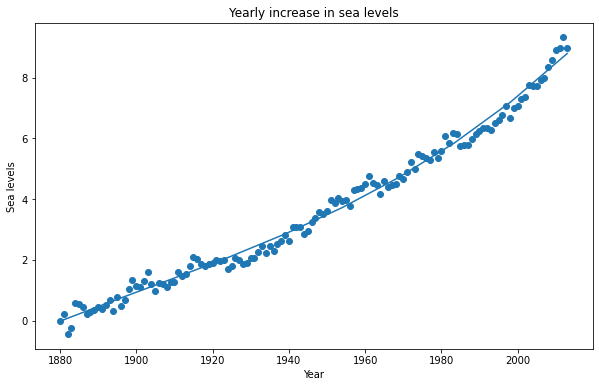

In [ ]:
from sklearn.metrics import r2_score
y = np.array(df_new["CSIRO Adjusted Sea Level"],np.float64)
x = np.array(df_new["Year"],np.int64)
polymodel = np.poly1d(np.polyfit(x, y, 3))

polyline = np.linspace(1880, 2013, 10)
coeff = polymodel.coef
print("Fit coefficients: ", coeff)
r_sq_poly = r2_score(y, polymodel(x))
print("R-square value for second degree polynomial: ", r_sq_poly)
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.plot(polyline, polymodel(polyline))
plt.xlabel("Year")
plt.ylabel("Sea levels")
plt.title("Yearly increase in sea levels")
plt.show()

I think this is a pretty decent fit with R-square = 0.9895450699416333. 

We can automate this process using pipelines. Pipelines can be created using Pipeline from sklearn and are often used in Machine learning. I used a code similar to https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/ to do this.

Let's try using pipeline to actually see how the prediction with second degree polynomial looks like compared to the data.

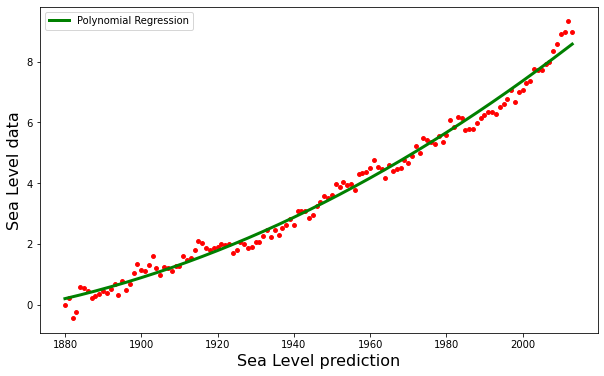

In [ ]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
pipe_input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(pipe_input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15,color = 'red')
plt.plot(x_poly,poly_pred,color='g',linewidth=3,label='Polynomial Regression')
plt.xlabel('Sea Level prediction',fontsize=16)
plt.ylabel('Sea Level data',fontsize=16)
plt.legend()
plt.show()

I have chosen a degree of polynomial as 2. Choosing 1 would give us back linear regression. So I chose the next level which is 2. We could keep increasing the degree of polynomial to see which works best. 

Now let us look at what the polynomial prediction tell us about the future sea-levels.

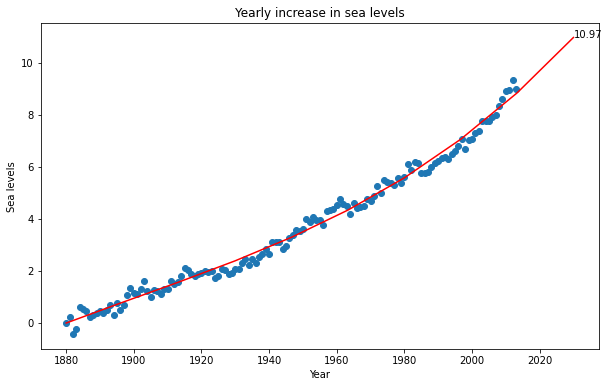

In [43]:
polyline = np.linspace(1880, 2030, 10)
model_poly = polymodel(polyline)
label = "{:.2f}".format(model_poly[9])
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.plot(polyline, model_poly, color = 'red')
plt.xlabel("Year")
plt.ylabel("Sea levels")
plt.title("Yearly increase in sea levels")
ax1 = plt.gca()
ax1.annotate(label, xy=(2030, model_poly[9]))
plt.show()

The above results shows that according to the polynomial fit, the sea-levels will reach 10.97 cm in 2030, if the current trend continues.

This is very different to the predictions we got from linear models Before correcting for the increase in 2000, the linear model predicted an increase to 10.18 cm and after correction to include the change since 2000 the linear model predicted 12.05 cms.

#Conclusion
---
Using pandas, numpy, sklearn and python visualisation tools like matplotlib, makes the analysing and understanding of data sets (in this case sea level data set) and building predictive models to look into what to expect in the future really easy and quick. Writing and calling user defined functions, using pre-existing functions for statistical modelling and visualisations make it very easy to build predictive models.

# Reflection
----

## What skills have I demonstrated in completing this Project?

I have used my data retrieval, cleaning and wrangling skills and have been able to use pandas and numpy libraries for this project. I used pandas library for retrieving, sorting and cleaning the data while I used numpy to do Statistical analyses. I have also used user defined functions, performed linear and polynomial regressions and visualisations, I have used these skills for gaining better insights into the data.

## What did I learn in this project?

This was a fairly easy project since I am used to working in data analyses. The only challenge was being able to do my analyses (what I used to do with R) using python. I think numpy is quite handy when we have large amount of numeric data. The use of arrays and matrices can go beyond use in Statistics and I am keen to know more about using numpy for calculations involving matrices.

This project definitely tested my programming skills. For example, using sensible variable names, that are meaningful for others as well as me is one of the things I learnt while doing this project. Another thing is not using variable names like input which is actually a function name in python. Writing functions for repeated operations also makes the code more efficient.

For the future development, I would like to start looking into polynomial regressions in sklearn and get more familiar with automating using pipelines - I found more than one way of doing it. I could have tested out to see if there were any differences in them and see which one is more easy to use and get better results.

After doing this project, I was curious to know what other methods were used to analyse sea-level data and I found an article published in October 2021 of Oceanologia, Volume 63, Issue 4, October–December 2021, Pages 531-544. It shows that a polynomial fit to degree 2 gives better results for modelling sea levels predictions using Machine learning (although the article looks into seaonal change as well as over all change). I am quite pleased to see that my thinking is along the same lines. 
Link for the article: https://doi.org/10.1016/j.oceano.2021.07.003

## What are the worksheets where I learnt the skills used in this project?


*   Data retrieval : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/1_Data_retrieval.ipynb
*   Data sorting and cleaning : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/3_Sorting_and_cleaning.ipynb
* Wrangle the data : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/4_Wrangle_the_data.ipynb
* Numpy : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/5_numpy.ipynb
* Visualisations with matplotlib : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/7_1_Visualisation_with_matplotlib.ipynb
* Correlation with linegress : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/8_1_Correlation_with_linregress.ipynb
* Correlation exercises : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/8_2_Correlation_exercises.ipynb
* Sea level project (using numpy) : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/Sea_Level_Project.ipynb

